## Project: Capstone Project - (New York City Current Job Postings _ Kaggle Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#Business understanding">Business understanding</a></li>
<li><a href="#Data understanding">Data understanding</a></li>
<li><a href="#Data preparation and clean">Data preparation and clean</a></li>
<li><a href="#Answer Questions base on dataset">Answer Questions base on dataset</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>
Done by:
Areej Albishi

<a id='intro'></a>
# Introduction

"This dataset contains current job postings available on the City of New York’s official jobs site (http://www.nyc.gov/html/careers/html/search/search.shtml). Internal postings available to city employees and external postings available to the general public are included.the  dataset is hosted by the City of New York. The city has an open data platform found(https://opendata.cityofnewyork.us/) and they update their information according the amount of data that is brought in. Explore New York City using Kaggle and all of the data sources available through the City of New York organization page!

Update Frequency: This dataset is updated weekly."


- Business understanding
- Data understanding
- Data preparation and clean
- Answer Questions base on dataset 
- conclusions

<a id='Business understanding'></a>

# Business understanding

In this project, i will focus to answer this 4 questions:
- What is the top job posting Agencies in New York City? 
- What is the Top Business Title needed in New Yourk?
- Full_Time and Part_Time of job posting indicator in New York?
- What kind of Business Title in new york offerd highest number of job position ?


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import glob
import os
%matplotlib inline
import seaborn as sns
import matplotlib

# magic word for producing visualizations in notebook
%matplotlib inline

In [3]:
import pandas as pd
df = pd.read_csv('nyc-jobs.csv',header=0,encoding = 'unicode_escape')

<a id='Data understanding'></a>
# Data understanding
In this section i got ageneral idea about the data throw using head() and hist() plot and info() of the cloumns to get general idea about the data .

In [4]:
df.head()

,Job ID,Agency,Posting Type,# Of Positions,Business Title,Civil Service Title,Title Code No,Level,Job Category,Full-Time/Part-Time indicator,...,Additional Information,To Apply,Hours/Shift,Work Location 1,Recruitment Contact,Residency Requirement,Posting Date,Post Until,Posting Updated,Process Date
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,40563,1,NaN,NaN,...,"Salary range for this position is: $42,405 - $...",NaN,NaN,NaN,NaN,New York City residency is generally required ...,2011-06-24T00:00:00.000,NaN,2011-06-24T00:00:00.000,2019-12-17T00:00:00.000
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,10009,M3,NaN,F,...,NaN,"In addition to applying through this website, ...",NaN,NaN,NaN,New York City residency is generally required ...,2012-01-26T00:00:00.000,NaN,2012-01-26T00:00:00.000,2019-12-17T00:00:00.000
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle DriverÃ¢â¬â¢s License va...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-12-17T00:00:00.000
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,90698,0,Maintenance & Operations,F,...,1. A Motor Vehicle DriverÃ¢â¬â¢s License va...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirements.,2013-10-24T00:00:00.000,NaN,2013-12-12T00:00:00.000,2019-12-17T00:00:00.000
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,91830,0,Maintenance & Operations,F,...,SPECIAL NOTE: 1. This is a temporary assig...,"Click the ""Apply Now"" button.",NaN,NaN,NaN,NYCHA has no residency requirement.,2014-01-09T00:00:00.000,NaN,2014-01-08T00:00:00.000,2019-12-17T00:00:00.000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 28 columns):
Job ID                           2946 non-null int64
Agency                           2946 non-null object
Posting Type                     2946 non-null object
# Of Positions                   2946 non-null int64
Business Title                   2946 non-null object
Civil Service Title              2946 non-null object
Title Code No                    2946 non-null object
Level                            2946 non-null object
Job Category                     2944 non-null object
Full-Time/Part-Time indicator    2751 non-null object
Salary Range From                2946 non-null float64
Salary Range To                  2946 non-null float64
Salary Frequency                 2946 non-null object
Work Location                    2946 non-null object
Division/Work Unit               2946 non-null object
Job Description                  2946 non-null object
Minimum Qual Requirements    

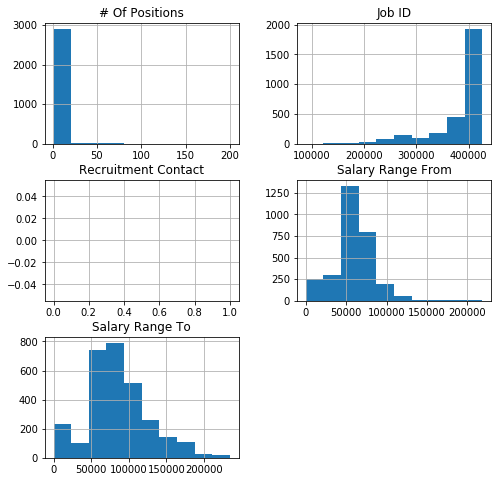

In [6]:
df.hist(figsize=(8,8));

<a id='Data preparation and clean'></a>
# Data preparation and clean
In this section of the report, i will check for duplication, null values and drop unnessecary cloumns in analysis ,i will clean the dataset to prepare it for analysis.

In [7]:
#rename coloumns
df.columns = ['Job_ID', 'Agency', 'Posting_Type','Number_Of_Positions', 'Business_Title', 'Civil_Service_Title','Title_Code_No','Level', 'Job_Category', 'Full_Time_and_Part_Time_indicator','Salary_Range_From', 'Salary_Range_To', 'Salary_Frequency','Work_Location','Division_and_Work_Unit', 'Job_Description', 'Minimum_Qual_Requirements','Preferred_Skills','Additional_Information', 'To_Apply','Hours_and_Shift','Work_Location_1','Recruitment_Contact','Residency_Requirement','Posting_Date','Post_Until','Posting_Updated','Process_Date']

In [8]:
#check rename coloumns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2946 entries, 0 to 2945
Data columns (total 28 columns):
Job_ID                               2946 non-null int64
Agency                               2946 non-null object
Posting_Type                         2946 non-null object
Number_Of_Positions                  2946 non-null int64
Business_Title                       2946 non-null object
Civil_Service_Title                  2946 non-null object
Title_Code_No                        2946 non-null object
Level                                2946 non-null object
Job_Category                         2944 non-null object
Full_Time_and_Part_Time_indicator    2751 non-null object
Salary_Range_From                    2946 non-null float64
Salary_Range_To                      2946 non-null float64
Salary_Frequency                     2946 non-null object
Work_Location                        2946 non-null object
Division_and_Work_Unit               2946 non-null object
Job_Description        

In [9]:
#check duplication
df.duplicated().sum()

31

In [10]:
#drop duplicated rows
df = df.drop_duplicates(keep='last')

In [11]:
#check
df.duplicated().sum()

0

In [12]:
#drop coloumn that not used in analysis
df.drop(['Title_Code_No','Level','Salary_Range_From','Salary_Range_To','Work_Location_1','Division_and_Work_Unit','Job_Description','Minimum_Qual_Requirements','Preferred_Skills','Additional_Information','To_Apply','Hours_and_Shift','Work_Location','Recruitment_Contact','Residency_Requirement','Posting_Date','Post_Until','Posting_Updated','Process_Date'], axis=1, inplace=True)
df.head()

,Job_ID,Agency,Posting_Type,Number_Of_Positions,Business_Title,Civil_Service_Title,Job_Category,Full_Time_and_Part_Time_indicator,Salary_Frequency
0,87990,DEPARTMENT OF BUSINESS SERV.,Internal,1,Account Manager,CONTRACT REVIEWER (OFFICE OF L,NaN,NaN,Annual
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,NaN,F,Annual
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,Maintenance & Operations,F,Annual
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,Maintenance & Operations,F,Annual
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,Maintenance & Operations,F,Hourly


In [13]:
#check null
df.isnull().sum()

Job_ID                                 0
Agency                                 0
Posting_Type                           0
Number_Of_Positions                    0
Business_Title                         0
Civil_Service_Title                    0
Job_Category                           2
Full_Time_and_Part_Time_indicator    193
Salary_Frequency                       0
dtype: int64

In [14]:
df.Posting_Type.value_counts()

Internal    1653
External    1262
Name: Posting_Type, dtype: int64

In [15]:
df.Agency.value_counts()

DEPT OF ENVIRONMENT PROTECTION    650
NYC HOUSING AUTHORITY             231
DEPT OF HEALTH/MENTAL HYGIENE     187
DEPARTMENT OF TRANSPORTATION      180
DEPT OF DESIGN & CONSTRUCTION     142
TAXI & LIMOUSINE COMMISSION       134
ADMIN FOR CHILDREN'S SVCS         108
DEPT OF INFO TECH & TELECOMM      107
LAW DEPARTMENT                     90
HOUSING PRESERVATION & DVLPMNT     86
OFFICE OF THE COMPTROLLER          64
POLICE DEPARTMENT                  63
OFFICE OF MANAGEMENT & BUDGET      58
NYC EMPLOYEES RETIREMENT SYS       54
DEPARTMENT OF INVESTIGATION        53
DEPARTMENT OF BUSINESS SERV.       52
DEPARTMENT OF CORRECTION           49
DEPARTMENT OF CITY PLANNING        43
DEPT OF CITYWIDE ADMIN SVCS        42
DEPARTMENT OF SANITATION           40
DEPT OF YOUTH & COMM DEV SRVS      38
DEPT OF PARKS & RECREATION         37
DEPARTMENT FOR THE AGING           36
HUMAN RIGHTS COMMISSION            34
FINANCIAL INFO SVCS AGENCY         31
HRA/DEPT OF SOCIAL SERVICES        31
MAYORS OFFIC

In [16]:
df.Business_Title.value_counts()

Assistant Civil Engineer                                            32
Project Manager                                                     29
College Aide                                                        24
Construction Project Manager                                        22
ACCOUNTABLE MANAGER                                                 20
Confidential Investigator                                           18
Watershed Maintainer                                                17
Prosecuting Attorney                                                16
Investigator                                                        16
Senior Project Manager                                              15
Stationary Engineer (Electric)                                      13
COMPUTER SPECIALIST (SOFTWARE)                                      12
Budget Analyst                                                      12
Civil Engineer 2                                                    12
Data S

In [17]:
df.Full_Time_and_Part_Time_indicator.value_counts()

F    2597
P     125
Name: Full_Time_and_Part_Time_indicator, dtype: int64

In [18]:
df.Salary_Frequency.value_counts()

Annual    2683
Hourly     194
Daily       38
Name: Salary_Frequency, dtype: int64

<a id='Answer Questions base on dataset'></a>
# Answer Questions base on dataset

## What is the top job posting Agencies in New York City?


In [19]:
#Answer
df_Top_Agencies = df.Agency.value_counts(ascending=False)
print(df_Top_Agencies.head(10))

DEPT OF ENVIRONMENT PROTECTION    650
NYC HOUSING AUTHORITY             231
DEPT OF HEALTH/MENTAL HYGIENE     187
DEPARTMENT OF TRANSPORTATION      180
DEPT OF DESIGN & CONSTRUCTION     142
TAXI & LIMOUSINE COMMISSION       134
ADMIN FOR CHILDREN'S SVCS         108
DEPT OF INFO TECH & TELECOMM      107
LAW DEPARTMENT                     90
HOUSING PRESERVATION & DVLPMNT     86
Name: Agency, dtype: int64


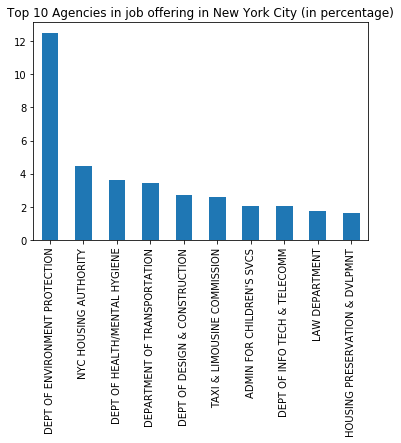

In [20]:
#plot
(df_Top_Agencies.head(10)/df_Top_Agencies.shape[0]).plot(kind="bar");
plt.title("Top 10 Agencies in job offering in New York City (in percentage)");

## What is the Top Business Title needed in New York?


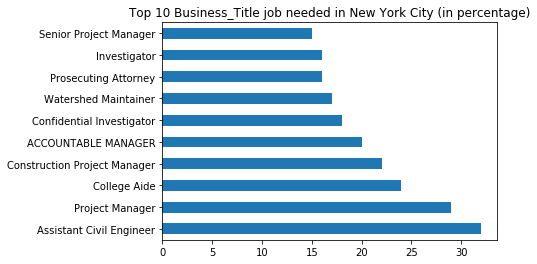

In [21]:
#Top Business_title needed in New York?
df_b=df['Business_Title'].value_counts()[:10].plot(kind='barh')
plt.title("Top 10 Business_Title job needed in New York City (in percentage)");

## Full_Time and Part_Time of job posting indicator in New York?

In [22]:
#Answer
##first we remove the nan by using dropna()
df= df.dropna(how='any', subset=['Full_Time_and_Part_Time_indicator'])
df.head()

,Job_ID,Agency,Posting_Type,Number_Of_Positions,Business_Title,Civil_Service_Title,Job_Category,Full_Time_and_Part_Time_indicator,Salary_Frequency
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,NaN,F,Annual
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,Maintenance & Operations,F,Annual
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,Maintenance & Operations,F,Annual
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,Maintenance & Operations,F,Hourly
5,133921,NYC HOUSING AUTHORITY,External,50,Temporary Painter,PAINTER,Maintenance & Operations,F,Hourly


In [23]:
#oh hot encodingwe change the coloumn from category to integer to be able to plot it 1= full time and 0= part time
df=df.replace({'Full_Time_and_Part_Time_indicator':{'F':1,'P':0}})
df.head()

,Job_ID,Agency,Posting_Type,Number_Of_Positions,Business_Title,Civil_Service_Title,Job_Category,Full_Time_and_Part_Time_indicator,Salary_Frequency
1,97899,DEPARTMENT OF BUSINESS SERV.,Internal,1,"EXECUTIVE DIRECTOR, BUSINESS DEVELOPMENT",ADMINISTRATIVE BUSINESS PROMOT,NaN,1,Annual
2,132292,NYC HOUSING AUTHORITY,External,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,Maintenance & Operations,1,Annual
3,132292,NYC HOUSING AUTHORITY,Internal,52,Maintenance Worker - Technical Services-Heatin...,MAINTENANCE WORKER,Maintenance & Operations,1,Annual
4,133921,NYC HOUSING AUTHORITY,Internal,50,Temporary Painter,PAINTER,Maintenance & Operations,1,Hourly
5,133921,NYC HOUSING AUTHORITY,External,50,Temporary Painter,PAINTER,Maintenance & Operations,1,Hourly


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2722 entries, 1 to 2945
Data columns (total 9 columns):
Job_ID                               2722 non-null int64
Agency                               2722 non-null object
Posting_Type                         2722 non-null object
Number_Of_Positions                  2722 non-null int64
Business_Title                       2722 non-null object
Civil_Service_Title                  2722 non-null object
Job_Category                         2721 non-null object
Full_Time_and_Part_Time_indicator    2722 non-null int64
Salary_Frequency                     2722 non-null object
dtypes: int64(3), object(6)
memory usage: 212.7+ KB


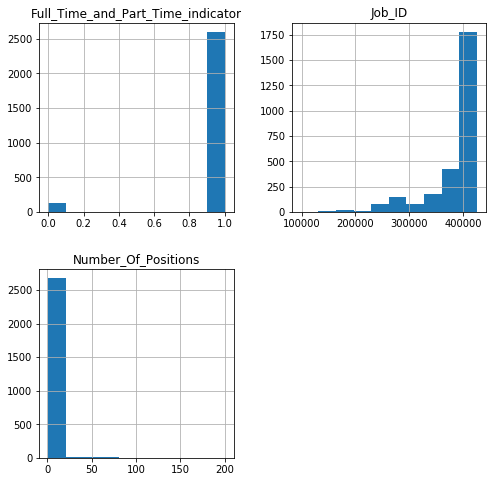

In [25]:
df.hist(figsize=(8,8));

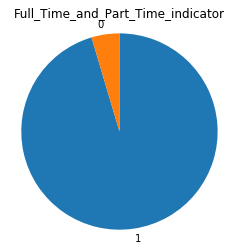

In [24]:
#Full_Time_and_Part_Time_indicator
sorted_counts = df['Full_Time_and_Part_Time_indicator'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index,startangle = 90,counterclock = False);
plt.axis('square')
plt.title('Full_Time_and_Part_Time_indicator');

## What kind of Business Title in new york offerd highest number of job position ?

In [25]:
df[['Number_Of_Positions', 'Business_Title']].sort_values('Number_Of_Positions', ascending=False).nlargest(10, 'Number_Of_Positions')

,Number_Of_Positions,Business_Title
2932,200,City Seasonal Aide/Security Guard
2933,200,City Seasonal Aide/Security Guard
2489,120,Police Administrative Aide
774,91,CARETAKER J
773,91,CARETAKER J
719,80,Seasonal City Park Worker
718,80,Seasonal City Park Worker
600,80,Sewage Treatment Worker
601,80,Sewage Treatment Worker
400,80,ASSISTANT CORPORATION COUNSEL


<a id='conclusions'></a>
# conclusions

 - the top job posting Agencies in New York City
    - DEPT OF ENVIRONMENT PROTECTION
    - NYC HOUSING AUTHORITY 
    - DEPT OF HEALTH/MENTAL HYGIENE 
    - DEPARTMENT OF TRANSPORTATION 
    - DEPT OF DESIGN & CONSTRUCTION 
    - TAXI & LIMOUSINE COMMISSION 
    - ADMIN FOR CHILDREN'S SVCS 
    - DEPT OF INFO TECH & TELECOMM 
    - LAW DEPARTMENT 
    - HOUSING PRESERVATION & DVLPMNT
     
 - Top Business Title needed in New Yourk?    
    - Assistant Civil Engineer 
    - Project Manager 
    - College Aide   
    - ACCOUNTABLE MANAGER 
    - Confidential Investigator   
    - Watershed Maintainer 
    - Prosecuting Attorney 
    - Investigator                                                                            
    - Construction Project Manager
    - Senior Project Manager
 - Full_Time and Part_Time job posting indicator show that most jop posting are offering a full time job
 - The Business Title in new york that offerd highest number of job position are:
    -  City Seasonal Aide/Security Guard which offer about 200 job position
    -  Police Administrative Aide that offers about 120 job position
    -  CARETAKER offers about 91 job position
    -  Seasonal City Park Worker 80 job positions
    -  Sewage Treatment Worker also about 80 job positions
    -  ASSISTANT CORPORATION COUNSEL 80 job positions
 

- Refrencess:
     -  https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.plot.bar.html
     -  https://classroom.udacity.com/nanodegrees/nd002-connect/dashboard/overview
     -  https://towardsdatascience.com/a-guide-to-pandas-and-matplotlib-for-data-exploration-56fad95f951c
     -  https://www.datacamp.com/community/tutorials/categorical-data
     -  https://slack.com/intl/en-sa/
     -  https://www.kaggle.com/new-york-city/new-york-city-current-job-postings
